In [17]:
from scipy import special
import sympy as sp
from sympy.plotting import plot
from IPython.display import display, Latex

sp.init_printing(fontsize=20)

In [18]:
def C(j,n):
    assert j>0
    assert j%2
    assert n%2
    assert n>=j
    
    return special.comb(n,(j+n)/2,exact=True)

In [19]:
N = 21
j = 11
print("j={}; N={}".format(j, N))
for n in range(j,N+1, 2):
    print("n={} => C(j,n)=C({},{})={}".format(n,j,n,C(j,n)))

j=11; N=21
n=11 => C(j,n)=C(11,11)=1
n=13 => C(j,n)=C(11,13)=13
n=15 => C(j,n)=C(11,15)=105
n=17 => C(j,n)=C(11,17)=680
n=19 => C(j,n)=C(11,19)=3876
n=21 => C(j,n)=C(11,21)=20349


In [20]:
j, n, N = sp.symbols('j, n, N')
A = sp.symbols('A', real=True)
phi = sp.symbols('\\phi')

In [21]:
l_n = lambda n: sp.symbols("\\lambda_{{{}}}".format(n).replace(" ",""))

In [22]:
def C(j,n):
    k = (j+n)/2
    return sp.factorial(n)/(sp.factorial(k)*sp.factorial(n-k))

In [23]:
C(N-4, N)

In [24]:
def A_num(j, N):
    assert j>0
    assert j%2
    assert N%2
    assert N>=j
    
    summy = sp.zeros(1)[0]
    
    for n in range(j,N+1, 2):
        summy = summy + l_n(n)*A0**n * C(j,n)
        
    return summy
        

In [25]:
def A_sym(j: sp.Basic, N: sp.Basic):
    assert isinstance(j, sp.Basic)
    assert isinstance(N, sp.Basic)
    
    diff = N-j

    assert diff>=0
    assert isinstance(diff, sp.core.numbers.Integer)
    assert diff%2 == 0

    summy_sum = sp.Integer(0)
    sequence = [j+i-1 for i in range(1, 1+(diff+1), 2)]
    
    for n in sequence:
        c = C(j,n).simplify()
        l = l_n(n)
    
        summy_sum = summy_sum + l*c*(A/sp.Integer(2))**(n)
        
    return summy_sum

In [26]:
sp.Equality(j,N-1)

In [27]:
def j_list(DN: sp.Integer):
    '''Generates a list of lhs coefficients, one for each harmonic \'j\''''
    
    listy_list = []
    for j_val in [N-i for i in range(DN, -1, -2)]:
        lhs = A_sym(j_val, N)
        rhs = sp.Integer(2)/(j_val*sp.pi) * (-1)**((j_val-1)/sp.Integer(2))

        listy_list.append((j_val, lhs, rhs))
    return listy_list

In [28]:
_2 = sp.Integer(2)
_4 = sp.Integer(4)

test_term = (_2 * _2**(_2*N) - _4**N*N + 4**N)

In [29]:
test_term

In [30]:
substitutions = ( (_2**(_2*N), _4**N), ((1/A)**N, A**(-N)))
simplifications = (sp.simplify, sp.factor)

def slab_simplify(expr, iter: int = 1):
    for n in range(iter):
        for old, new in substitutions:
            expr = expr.subs(old, new)

        for simp in simplifications:
            expr = simp(expr)

    return expr

display(test_term)
temp = test_term
for old, new in substitutions:
    temp = temp.subs(old, new)

display(substitutions)
temp

temp2 = temp
for simp in simplifications:
    temp2 = simp(temp2)

display(simplifications)
temp2


(<function sympy.simplify.simplify.simplify(expr, ratio=1.7, measure=<function count_ops at 0x7f55fc2351c0>, rational=False, inverse=False, doit=True, **kwargs)>,
 <function sympy.polys.polytools.factor(f, *gens, deep=False, **args)>)

In [37]:
DN = sp.Integer(9)

listy_wisty = j_list(DN)[::-1]
latty_mate = f"""\\begin{{align}}"""
solutions = []
for terms in listy_wisty:
    j_n, lhs, rhs = terms

    eq = sp.Equality(lhs, rhs)

    for lamby_damby in solutions:
        j, symb, sol = lamby_damby
        eq = eq.subs(symb, sol)
        eq = slab_simplify(eq)

    symb = l_n(j_n)
    sol = sp.solve(eq, symb)[0]
    
    sol = slab_simplify(sol)    

    ap = (j_n, symb, sol)
    solutions.append(ap)

    latty_mate = latty_mate + f"""
j = {sp.latex(j_n)} \\qquad &\\rightarrow \\qquad {sp.latex(lhs)} = {sp.latex(rhs)} \\\\
&\\rightarrow {sp.latex(symb)} = {sp.latex(sol)} \\\\
\\\\ \\ \\\\
"""
    
latty_mate= latty_mate + f"""\\end{{align}}"""

display(Latex(latty_mate))

AssertionError: 

In [ ]:
print("Total of {} solutions.".format(len(solutions)))

In [ ]:
def compy(j1, j2):
    s1 = solutions[j1]
    s2 = solutions[j2]

    return s1[0]/s2[0], s1[1]/s2[1], s1[2]/s2[2]

In [ ]:
for i in range(1, len(solutions)):
    compy_comp = compy(i,0)
    simpy = slab_simplify(compy_comp[2])

    print("i={}".format(i))

    display(compy_comp[1])
    display(simpy)

    print('--------------------------------')

In [ ]:
for j, symb, sol in solutions:
    display(j, symb, sol)
    

In [ ]:
def subsy(N_num: sp.Integer, A_num: sp.RealNumber = A, no_plot: bool = False):
    assert N_num>0
    assert N_num%2
    
    should_plot = isinstance(A_num, (float, int, sp.Number))

    V = sp.Integer(0)
    
    coeffs = []
    for j, symb, sol in solutions:
        coef = slab_simplify(sol.subs(N, N_num).subs(A, A_num))
        exponent = j.subs(N,N_num)

        if exponent < 1: break

        symb = l_n(exponent)

        V += coef*phi**(exponent+1) / sp.Integer(exponent+1)

        coeffs.append((exponent+1, symb, coef))

        if not should_plot:
            display(symb, coef)

    dV = V.diff(phi)
    square_wave = -dV.subs(phi, sp.cos(x)).simplify()

    if not should_plot:
        display(V)
        display(-dV)
        display(square_wave)

    if should_plot and not no_plot:
        r = sp.RealNumber(1.15) * A_num
        phi_range = (phi, -r, r)

        one = 1.25

        a = sp.plot(V, phi_range, ylim=(-0.1, r), label='$V_{NL}(\\phi)$', show=False)
        b = sp.plot(-dV, phi_range, ylim=(-one,one), label='$-V\'(\\phi)$', show=False)
        c = sp.plot(square_wave, (x, -4*sp.pi, 4*sp.pi), ylim=(-one,one), label='$-V\'(\\cos(x))$', show=False)

        a.legend = True
        a.xlabel = '$\\phi$'
        a.ylabel = '$V_{NL}(\\phi)$'
        a.show()
        b.legend = True
        b.xlabel = '$\\phi$'
        b.ylabel = '$-V\'(\\phi)$'
        b.show()
        c.legend = True
        c.xlabel = '$x$'
        c.ylabel = '$-V\'(\\cos(x))$'
        c.show()

    return V, dV, square_wave, coeffs  

    

In [ ]:
V, dV, square_wave, coeffs = subsy(15, A)

In [ ]:
N_max = 17

V1 = subsy(N_max, 0.5, no_plot=True)[0]
#V2 = subsy(15, 1.0, no_plot=True)[0]
#V3 = subsy(15, 1.5, no_plot=True)[0]
V4 = subsy(N_max, 2.0, no_plot=True)[0]

r = sp.RealNumber(1.15) * 2
phi_range = (phi, -r, r)

a = sp.plot(V1, V4, phi_range, ylim=(-0.1, 2.5))
a.legend = True


In [ ]:
plots = []
labels = []
plo = plot(show=False, ylim=(-10,10))
for p, label, coef in coeffs:
    display(label)
    display(coef)
    r = 4
    
    plo.extend(plot(coef, (A,1.e-2,r), adaptive=False, n=2, label=label, show=False))

plo.legend = True
plo.xlabel = 'A'
plo.ylabel = '$\lambda_n(A)$'
plo.show()


One can determine the coefficients as $\lambda_{N-2k}=\lambda_{N}$ can

In [ ]:
lambda_N = sp.Eq(sp.symbols('\\lambda_N'), (-1)**((N-1)/2)*(2/A)**N*2/N/sp.pi)
lambda_N

In [ ]:
k, s1, s2 = sp.symbols('k, \\lambda_{{N-2k}}, \\lambda_N')
propy_symbol = s1/s2
propy = (-1)**k*sp.factorial(N-k)/sp.factorial(N-2*k)*A**(2*k)*N/4**k/sp.factorial(k)/(N-2*k)
def prop__lambda_Nm2k__lambda_N(k_num:int):
    propy_subsy = propy.subs(k, k_num)
    index = N-sp.Integer(2)*k_num
    s1b = sp.symbols('\\lambda_{{{}}}'.format(index).replace(' ',''))
    return sp.Eq(s1b/s2, propy_subsy)

print("This is a heuristic:")
prop__lambda_Nm2k__lambda_N(k)

In [ ]:
assert not (lambda_N.rhs-solutions[0][2]).simplify().factor().subs((1/A)**N, A**(-N))

In [ ]:
def lambda_Nm2k(k_num): 
    propy = prop__lambda_Nm2k__lambda_N(k_num)
    propy_lhs, propy_rhs = propy.lhs, propy.rhs

    lhs = propy_lhs*lambda_N.lhs
    rhs = propy_rhs*lambda_N.rhs
    rhs = slab_simplify(rhs)

    return sp.Eq(lhs, rhs)

In [ ]:
lambda_Nm2k(k)

In [ ]:
def lambda_Nm2k_version2(k_num):
    n = N-2*k_num

    coef = 2*(-1)**((N+1)/2)*(2/A)**n/sp.pi/n * sp.binomial(N-k, k)

    symb = sp.symbols('\\lambda_{{{}}}'.format(N-2*k_num).replace(' ', ''))

    return sp.Eq(symb,coef)


In [ ]:
lambda_Nm2k_version2(k)

In [ ]:
for i in range(1, 9, 2):
    print(i)
    expo = (i-1)/2
    print((-1)**(expo))
    print('---')

In [32]:
def lambda_n(n_num: sp.Integer, A_num: sp.RealNumber=A, N_num: sp.Integer=N):
    symb = sp.symbols('\\lambda_{{{}}}'.format(n_num).replace(' ',''))
    coef = 2*(-1)**((n_num-1)/2)/n_num/sp.pi * (2/A_num)**n_num * sp.binomial((N_num+n_num)/2,(N_num-n_num)/2)

    return sp.Eq(symb,coef)

In [33]:
N_num = 15
display(lambda_n(n))
for n_num in range(1, N_num+1, 2):
    display(lambda_n(n_num, N_num=N_num))

In [34]:
def  build_potential(N_num, A_num):
    V = sp.Integer(0)
    for n_num in range(1, N_num+1, 2):
        lambda_n_num = lambda_n(n_num, A_num=A_num, N_num=N_num).rhs
        V += sp.Rational(1,n_num+1)*lambda_n_num*phi**(n_num+1)

    return V    

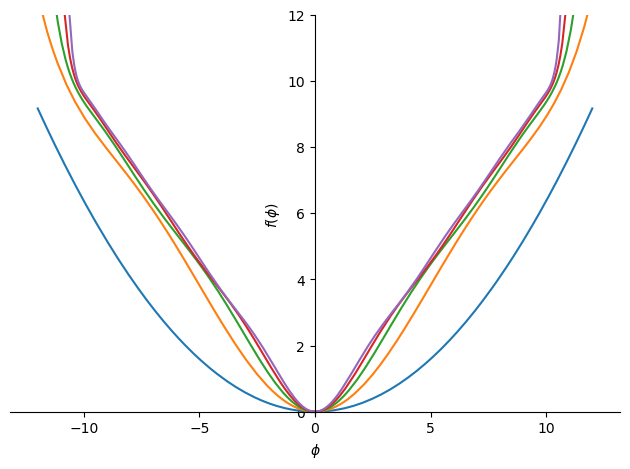

In [47]:
A_num = 10

V = build_potential(N_num=1, A_num=A_num)
plotty = sp.plot(V, (phi,-1.2*A_num,1.2*A_num), show=False)

for i in range(5, 21, 4):
    V = build_potential(N_num=i, A_num=A_num)

    plotty.extend(sp.plot(V, (phi,-1.2*A_num,1.2*A_num), show=False))


plotty.ylim = (-0.1, 1.2*A_num)
plotty.show()


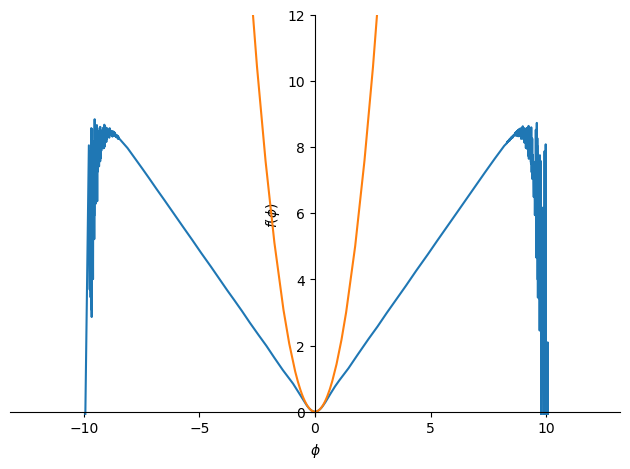

In [65]:
A_num = 10
N_num = 51

V = build_potential(N_num=N_num, A_num=A_num)
plotty = sp.plot(V, (phi,-1.2*A_num,1.2*A_num), show=False)

m2 = lambda_n(sp.Integer(1), A_num=A_num, N_num=sp.Integer(N_num)).rhs

mass_term = phi**2 * m2/2
display(mass_term)
plotty.extend(sp.plot(mass_term, (phi,-1.2*A_num,1.2*A_num), show=False))

plotty.ylim = (-0.1, 1.2*A_num)
plotty.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

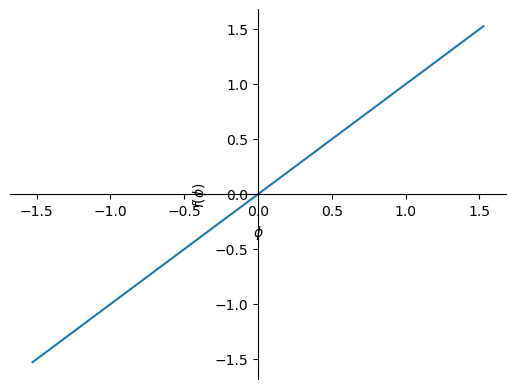

In [85]:
A_num = 4/sp.pi
N_num = 1

lambda_ = lambda_n(sp.Integer(1), A_num, N_num).rhs
term = phi * lambda_
plotty = sp.plot(term, (phi,-1.2*A_num,1.2*A_num), show=False)

for n in range(1, N_num, 2):
    lambda_ = lambda_n(sp.Integer(n), A_num, N_num).rhs
    term = phi**n * lambda_
    plotty.extend(sp.plot(term, (phi,-1.2*A_num,1.2*A_num), show=False))
    
plotty.ylim = (-0.1, 1.2*A_num)

plotty.show()

In [66]:
from matplotlib import pyplot

propy_equy = prop__lambda_Nm2k__lambda_N((N-1)/2).simplify()
display(propy_equy)

def get_lambda1_coeffs(N_num_max : int, A_num : sp.RealNumber = A):
    eqs = []
    for N_num in range(1, N_num_max+1, 2):
        funky = propy_equy.rhs.subs(N, N_num)
        if A_num != A:
            funky = funky.subs(A, A_num)
        propy_symby = sp.symbols('\\lambda_1')/sp.symbols('\\lambda_{{N={}}}'.format(N_num))
        
        eqs.append((N_num, sp.Eq(propy_symby, funky)))
        
    return eqs    

def plot_lambda1_coeffs(N_num_max : int, A_num = sp.RealNumber(1)):
    coeffs = get_lambda1_coeffs(N_num_max, A_num)
    points_x = []
    points_y = []
    for N_num, coef in coeffs:
        points_x.append(N_num)
        points_y.append(abs(coef.rhs))

    pyplot.semilogy(points_x, points_y, marker=',')
    pyplot.xlabel('N')
    pyplot.ylabel('$\\dfrac{\\lambda_1}{\\lambda_N}$')



NameError: name 'prop__lambda_Nm2k__lambda_N' is not defined

In [67]:
A_num = 1.95
plot_lambda1_coeffs(500, A_num)
print('A_num={}'.format(A_num))

NameError: name 'plot_lambda1_coeffs' is not defined

In [68]:
display(solutions[0][1])
display(solutions[0][2])
display(propy_equy)
propy_equy.rhs*solutions[0][2]

NameError: name 'propy_equy' is not defined

In [69]:

def get_lambdas(N_num: sp.Integer, A_num: sp.RealNumber):
    assert N_num>0
    assert N_num%2

    

    for k in range(int((N_num-1)/2), -1, -1):
        display(prop__lambda_Nm2k__lambda_N(k).subs(N, N_num).subs(A, A_num))
        

get_lambdas(5, 1)
    

NameError: name 'prop__lambda_Nm2k__lambda_N' is not defined

In [70]:
lambda_1 = (propy_equy.rhs*solutions[0][2]).simplify()
display(sp.Eq(sp.symbols('\\lambda_1^(N)'), lambda_1))

funky = lambda_1.subs(A,1)
funky 

NameError: name 'propy_equy' is not defined

In [71]:
coeffs = get_coeffs(13, 1-1.e-4)
V_the_final = sp.Integer(0)

for N_num, coef in coeffs:
    print(N_num)
    display(coef)
    V_the_final += coef.rhs*phi**(N_num+1)/(N_num+1)

V_the_final

NameError: name 'get_coeffs' is not defined

In [72]:
for k in range(1, 15):
    

SyntaxError: incomplete input (1578848007.py, line 2)

In [ ]:
from bokeh.io import output_notebook

In [ ]:
_1 = sp.Integer(1)

# https://oeis.org/A051711
def a(n: sp.Integer):
    assert n>=0

    if n==0: return _1

    return sp.factorial(n) * _4**n/_2